### **This notebook combines all the replies and tests how many replies are there for each user**

In [1]:
import pandas as pd
import numpy as np
import warnings
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from tqdm import tqdm
import sys
import os

import importlib

#### packages
import helper.strategy_helper as st
import helper.visualization as vz
import helper.helper as hp
import helper.file_helper as file_hp
import config.config as config

##### **Config files**

In [2]:
config = config.config()
path = config['PATHS']

derived_path = path['derived_path']
all_tweet_data = path['all_tweet_data']
plot_path = path['plot_path']

In [3]:
file_hp.create_folder(plot_path, 'mix_replies')
reply_plot_path = os.path.join(plot_path, 'mix_replies')

##### **All campaigns**

In [4]:
all_campaigns, names = st.bundle_campaign()

In [5]:
def get_path(path, 
             year, 
             campaign,
            ):
    '''
    Gets path to control and IO tweet file
    
    :param path: path to the directory where tweet is present
    :param year: year of compaign
    :param campaign: name of campaign
    :param check_control: whether to check if control is present
    
    return list
    '''
    
    ops_file_path = os.path.join(path, 
                                 year, 
                                 campaign, 
                                 f'{campaign}_tweets.pkl.gz')
    control_file_path = os.path.join(path, 
                                     year, 
                                     campaign, 
                                     'DriversControl', 
                                     f'{campaign}_control.pkl.gz')
    
    if os.path.isfile(control_file_path) == False:
        control_file_path = os.path.join(path, 
                                     year, 
                                     campaign, 
                                     'DriversControl', 
                                     f'{campaign}_tweets_control.pkl.gz')
        
    ops_flag = os.path.isfile(ops_file_path) == True
    
    if ops_flag:
        return {'ops': ops_file_path,
                'control': control_file_path
               }
    
    print('Files not found')
    
    return None

In [6]:
def combine_all_replies(all_campaigns, derived_path, 
                        type_of, filename, 
                        external=False,
                        language=None
                       ):
    '''
    Combines all the replies of data
    
    :param all_campaigns: dictionary of all campaign
    :param derived_path: path where the data to be saved
    :param type_of: type of data either information operation or control
    :param filename: name of file to be saved
    '''

    df = pd.DataFrame()
    for row in all_campaigns:
        for year in row:
            for new_campaign in row[year]:

                print(f'\n ------START: {year}: {new_campaign} ------- \n')

                data_path = get_path(all_tweet_data, year, 
                                     new_campaign)

                data = st.read_ops_control_data(data_path['ops'],
                                                data_path['control'], 
                                             [type_of])
                df_test = data[type_of]
                
                if len(df_test) == 0:
                    print(f'\n ------END: {year}: {new_campaign} ------- \n')
                    continue
                    
                if 'in_reply_to_tweetid' not in df_test.columns:
                    continue

                df_ops = df_test.loc[~df_test['in_reply_to_tweetid'].isnull()]
                
                # if language is not None:
                #     df_ops = df_ops.loc[df_ops['tweet_language'] == language]
                    
                df_ops['year'] = year
                df_ops['campaign'] = new_campaign

                if external == True:
                    df_ops = st.reply_to_external_users(df_ops)
                    
                df = df.append(df_ops[['tweetid', 'userid',
                                       'in_reply_to_tweetid', 
                                       'in_reply_to_userid',
                                       'tweet_language',
                                       'tweet_text',
                                       'tweet_time', 
                                       'year', 'campaign']], 
                               ignore_index=True)

                print(len(df))
                
    df.rename(columns={'tweetid': 'replier_tweetid',
                        'userid': 'replier_userid',
                        'in_reply_to_tweetid': 'poster_tweetid',
                        'in_reply_to_userid': 'poster_userid',
                        'created_at': 'tweet_time',
                        'year': 'year',
                        'campaign': 'campaign'
                       },
               inplace=True)
    
    path = os.path.join(derived_path, filename)

    df.to_pickle(f'{path}')
                

##### **Combine all the replies (regardless of language)**

In [8]:
filename = 'all_replies_campaign.pkl.gz'
ops_path = os.path.join(derived_path, filename)

# combine_all_replies(all_campaigns, 
#                     derived_path, 
#                     'ops', 
#                     filename,
#                     False,
#                     None
#                    )

##### **Combine all external replies (regardless of language)**

In [7]:
filename = 'all_external_replies_campaign.pkl.gz'
filename_control = 'all_external_replies_control_campaign.pkl.gz'


ops_path = os.path.join(derived_path, filename)

combine_all_replies(all_campaigns, 
                    derived_path, 
                    'ops', 
                    filename,
                    True,
                    None
                   )


 ------START: 2021_12: CNHU_0621 ------- 

1183

 ------START: 2021_12: CNCC_0621 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',
/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 


14395

 ------START: 2021_12: MX_0621 ------- 

19972

 ------START: 2021_12: REA_0621 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',
/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 


20850

 ------START: 2021_12: RNA_0621 ------- 

24721

 ------START: 2021_12: Tanzania_0621 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


37502

 ------START: 2021_12: uganda_0621 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


174707

 ------START: 2021_12: Venezuela_0621 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


253883

 ------START: 2020_12: armenia_202012 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


254146

 ------START: 2020_12: GRU_202012 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


257016

 ------START: 2020_12: IRA_202012 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


262603

 ------START: 2020_12: iran_202012 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',
/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 


351742

 ------START: 2020_09: ira_092020 ------- 

351814

 ------START: 2020_09: iran_092020 ------- 

352477

 ------START: 2020_09: thailand_092020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',
/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 


359321

 ------START: 2020_08: cuba_082020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


510442

 ------START: 2020_08: qatar_082020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


516089

 ------START: 2020_05: china_052020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


595390

 ------START: 2020_05: turkey_052020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


3669563

 ------START: 2020_05: russia_052020 ------- 


 ------START: 2020_04: egypt_022020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


4068486

 ------START: 2020_04: honduras_022020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


4254643

 ------START: 2020_04: indonesia_022020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


4804841

 ------START: 2020_04: sa_eg_ae_022020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


5674075

 ------START: 2020_04: serbia_022020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


7552035

 ------START: 2020_03: ghana_nigeria_032020 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


7560732

 ------START: 2019_11: saudi_arabia_112019 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


12903886

 ------START: 2019_08: china_082019 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19452126

 ------START: 2019_08: ecuador_082019 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19498285

 ------START: 2019_08: egypt_uae_082019 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19509869

 ------START: 2019_08: saudi_arabia_082019_1 ------- 



/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19509869

 ------START: 2019_08: spain_082019 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19518854

 ------START: 2019_08: uae_082019 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19618006

 ------START: 2019_06: catalonia_201906_1 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19620207

 ------START: 2019_06: russia_201906_1 ------- 



/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19620207

 ------START: 2019_06: iran_201906 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19936149

 ------START: 2019_06: venezuela_201906_1 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


19936274

 ------START: 2019_01: iran_201901_1 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


20487693

 ------START: 2019_01: russia_201901_1 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


20560073

 ------START: 2019_01: bangladesh_201901_1 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


20560383

 ------START: 2019_01: venezuela_201901 ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


20821598

 ------START: 2018_10: ira ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


21087804

 ------START: 2018_10: iranian ------- 



/tmp/ipykernel_1237285/169188010.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['year'] = year
/tmp/ipykernel_1237285/169188010.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ops['campaign'] = new_campaign
/tmp/ipykernel_1237285/169188010.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_ops[['tweetid', 'userid',


21427154


##### **Get count of how many IO accounts replied to each poster**
    **Get count of replies each tweet got**

In [12]:
def plot_histogram(df, path, column, xlabel, ylabel):
    fig, ax = plt.subplots()
    num_bins = max(df[column])

    n = ax.hist(df[column],
                num_bins, )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.yscale('log')
    plt.xscale('log')
    
    fig.savefig(path,
                facecolor='white', 
                transparent=False)
    plt.show()
    
    
def test(df, filename, 
         type_of='ops'):
    '''
    Get count of how many IO accounts replied to each poster
    Get count of replies each tweet got
    
    :param df: Dataframe
    :param filename: name of file to saved (information about 5 or more replies)
    :param type_of: type of data to consider for the count either ops or
    control
    '''
    ### How many replies each poster got
    df_grps = (df.groupby(['year', 'campaign', 
                        'poster_userid'])['replier_userid']
                          .nunique()
                          .to_frame('count_replies')
                          .reset_index())

    df_grps = df_grps.loc[df_grps['count_replies'] > 1]
    
    
    print('Min: Number of unique IO accounts replying to each poster in each campaign :', 
          min(df_grps['count_replies']))
    print('Max: Number of unique IO accounts replying to each poster in each campaign :', 
          max(df_grps['count_replies']))
    
    xlabel = 'Number of unique IO accounts replying to each poster'
    ylabel = 'Frequency of IO accounts'
    
    file_path = os.path.join(reply_plot_path, 
                        f'all_{type_of}_unique_IO_accounts_replying_to_each_poster.png')
                        
    plot_histogram(df_grps, file_path,
                   'count_replies',
                   xlabel, ylabel)
    
    #Number of posters that got 5 or more replies in each campaign
    
    df_grps_user_size = df_grps.loc[df_grps['count_replies'] >= 5]

    df_grps_user_size = (df_grps_user_size.groupby(['year', 'campaign'])['poster_userid']
                          .size()
                          .to_frame('poster_count_that_got_5_or_more_replies')
                          .reset_index())
    
    df_grps_user_size.to_pickle(filename)
        # 'each_campaign_count_of_reply_data.pkl.gz')
        
    print('Min number of posters that got reply from 5 or more IO accounts in each campaign :', 
          min(df_grps_user_size['poster_count_that_got_5_or_more_replies']))
    print('Max number of posters that got reply from 5 or more IO accounts in each campaign :', 
          max(df_grps_user_size['poster_count_that_got_5_or_more_replies']))
    
    #How many replies each tweet got from IO accounts
    df_grps_tweet = (df.groupby(['year', 'campaign', 'poster_tweetid',
                    'poster_userid'])['replier_userid']
                      .nunique()
                      .to_frame('count_replies')
                      .reset_index())
    
    xlabel = 'Number of replies each tweet got'
    ylabel = 'Frequency of tweets'
    file_path = os.path.join(reply_plot_path, 
                        f'all_{type_of}_replies_each_tweet_got.png')
    
    plot_histogram(df_grps_tweet,
                   file_path,
                   'count_replies',
                   xlabel, ylabel)

In [13]:
def number_of_tweets_per_poster(df, file_path, type_of='ops'):
    '''
    Gets number of tweets per poster
    :param df: Dataframe
    :param file_path: path to save the file
    :param type_of: type of file
    '''
    df_grps_tweet = (df.groupby(['year', 'campaign',
                                 'poster_userid'])['poster_tweetid']
                      .nunique()
                      .to_frame('count_replies')
                      .reset_index())
    
    xlabel = 'Number of tweets from each poster'
    ylabel = 'Frequency of poster'
    file_path = os.path.join(file_path, 
                        f'all_{type_of}_tweets_from_each_poster.png')
    
    plot_histogram(df_grps_tweet,
                   file_path,
                   'count_replies',
                   xlabel, ylabel)

In [26]:
def poster_each_io(df, file_path, type_of='ops'):
    '''
    Number of poster than IO accounts are replying to
    :param df: DataFrame
    :param file_path: path where plot to be saved
    :param type_of: type of file
    '''
    df_grps = (df.groupby(['year', 'campaign', 'replier_userid'])['poster_userid']
                          .nunique()
                          .to_frame('count_replies')
                          .reset_index())
    
    xlabel = 'Number of poster each IO account replied to'
    ylabel = 'Frequency of IO accounts'
    file_path = os.path.join(file_path, 
                        f'all_{type_of}_poster_each_io.png')
    
    # plot_histogram(df_grps,
    #                file_path,
    #                'count_replies',
    #                xlabel, ylabel)
    
    df_10 = df_grps.loc[df_grps['count_replies'] >= 10]
    
    print('IO accounts replied to more than or equal to 10 posters in all campaign :',
          len(df_10['count_replies']))

In [15]:
def replies_each_poster_each_io(df, file_path, type_of='ops'):
    '''
    Number of replies each poster got from each IO accounts
    
    :param df: Dataframe
    :param file_path: Path where plot is to be saved
    :param type_of: type of data
    '''
    df_grps = (df.groupby(['year', 'campaign', 'replier_userid',
                           'poster_userid', 
                          ])['poster_tweetid']
                          .nunique()
                          .to_frame('count_replies')
                          .reset_index())
    xlabel = 'Number of replies each poster got from each IO account'
    ylabel = 'Frequency IO and poster pair'
    file_path = os.path.join(file_path, 
                        f'all_{type_of}_poster_io_pair.png')
    
    plot_histogram(df_grps,
                   file_path,
                   'count_replies',
                   xlabel, ylabel)
    
    df_10 = df_grps.loc[df_grps['count_replies'] >= 10]
    
    print('Number of io account and poster pair that got more than 10 replies:',
          len(df_10))

In [16]:
filename = 'all_replies_campaign.pkl.gz'
filename_control = 'all_replies_control_campaign.pkl.gz'


ops_path = os.path.join(derived_path, filename)
control_path = os.path.join(derived_path, filename_control)

In [ ]:
### For IO

In [17]:
filename = 'all_external_replies_campaign.pkl.gz'
ops_path = os.path.join(derived_path, filename)

df_ops = pd.read_pickle(ops_path)

Min: Number of unique IO accounts replying to each poster in each campaign : 2
Max: Number of unique IO accounts replying to each poster in each campaign : 3438


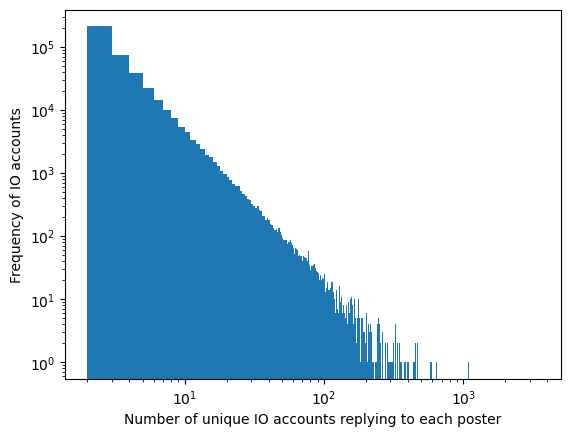

Min number of posters that got reply from 5 or more IO accounts in each campaign : 1
Max number of posters that got reply from 5 or more IO accounts in each campaign : 25291


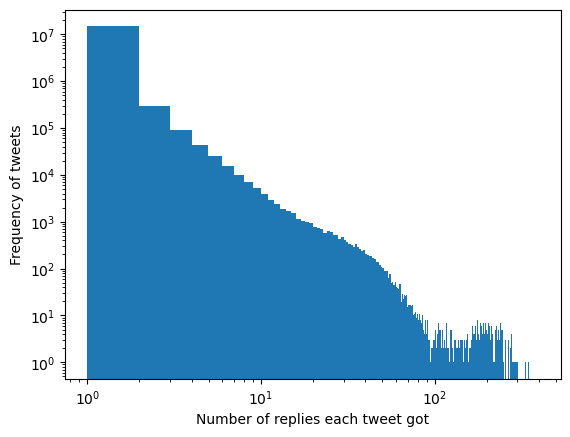

In [18]:
reply_info = os.path.join(derived_path, 
                          'ops_reply_info.pkl.gz')
test(df_ops, reply_info)

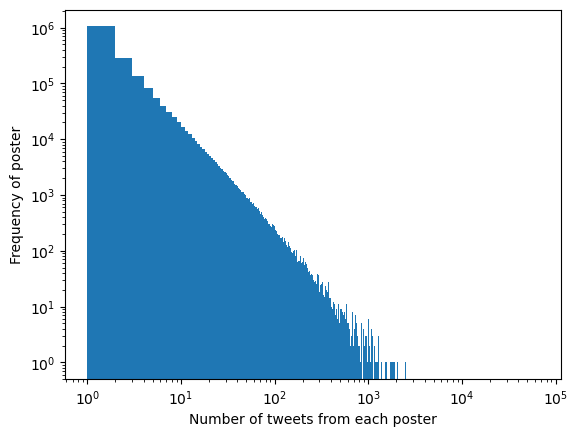

In [19]:
number_of_tweets_per_poster(df_ops, reply_plot_path)

In [27]:
poster_each_io(df_ops, reply_plot_path)

IO accounts replied to more than or equal to 10 posters in all campaign : 18424


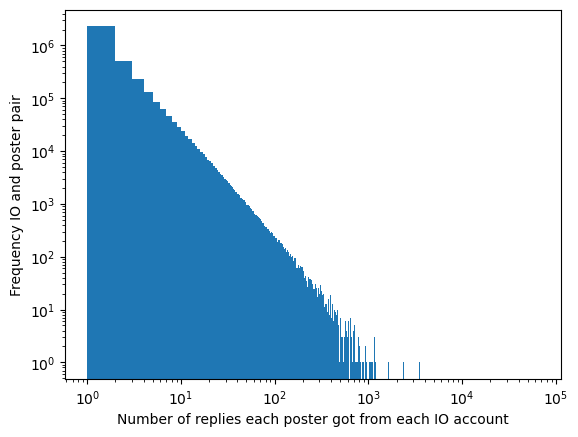

Number of io account and poster pair that got more than 10 replies: 254102


In [21]:
replies_each_poster_each_io(df_ops, reply_plot_path)

### **All campaign information for all reply**

In [22]:
reply_info = os.path.join(derived_path, 
                          'ops_reply_info.pkl.gz')


df_ops_info = pd.read_pickle(reply_info)

df_ops_info.head()

,year,campaign,poster_count_that_got_5_or_more_replies
0,2018_10,ira,970
1,2018_10,iranian,330
2,2019_01,iran_201901_1,2131
3,2019_01,russia_201901_1,92
4,2019_01,venezuela_201901,960


### **Checking for control**

In [64]:
def all_replies_control():
    all_campaigns, names = st.bundle_campaign()
    df = pd.DataFrame()
    for row in all_campaigns:
        for year in row:
            for new_campaign in row[year]:

                print(f'\n ------START: {year}: {new_campaign} ------- \n')

                ops_file_path = os.path.join(all_tweet_data, 
                                             year, 
                                             new_campaign, 
                                             f'{new_campaign}_tweets.pkl.gz')
                control_file_path = os.path.join(all_tweet_data, 
                                     year, 
                                     new_campaign, 
                                     'DriversControl', 
                                f'{new_campaign}_control.pkl.gz')

                data = st.read_ops_control_data(ops_file_path, 
                                             control_file_path, 
                                             ['control'])
                df_test = data['control']

                if len(df_test) == 0:
                    control_file_path = os.path.join(all_tweet_data, 
                                                     year, 
                                                     new_campaign, 
                                                     'DriversControl', 
                                                     f'{new_campaign}_control.pkl.gz')
                    df_test = st.read_ops_control_data(ops_file_path, 
                                             control_file_path, 
                                             ['control'])['control']

                    if len(df_test) == 0:
                        print(f'\n ------END: {year}: {new_campaign} ------- \n')
                        continue

                if 'in_reply_to_tweetid' not in df_test.columns:
                    continue

                df_ops = df_test.loc[~df_test['in_reply_to_tweetid'].isnull()]
                df_ops['year'] = year
                df_ops['campaign'] = new_campaign

                df = df.append(df_ops[['tweetid', 'userid',
                           'in_reply_to_tweetid', 'in_reply_to_userid',
                           'tweet_time', 'year', 'campaign']], 
                          ignore_index=True)

                print(len(df))


    df.rename(columns={'tweetid': 'replier_tweetid',
                            'userid': 'replier_userid',
                            'in_reply_to_tweetid': 'poster_tweetid',
                            'in_reply_to_userid': 'poster_userid',
                            'created_at': 'tweet_time',
                            'year': 'year',
                            'campaign': 'campaign'
                           },
                   inplace=True)

    df.to_pickle('all_replies_control_campaign.pkl.gz')

In [65]:
filename_control = 'all_replies_control_campaign.pkl.gz'


ops_path = os.path.join(derived_path, filename)
control_path = os.path.join(derived_path, filename_control)

# combine_all_replies(all_campaigns, 
#                     derived_path, 
#                     'control', 
#                     filename_control)

df_control = pd.read_pickle(control_path)